#### K Means Clustering Algorithms

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.datasets import make_blobs
%matplotlib inline 

In [2]:
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, random_state=23)

In [3]:
X.shape

(1000, 2)

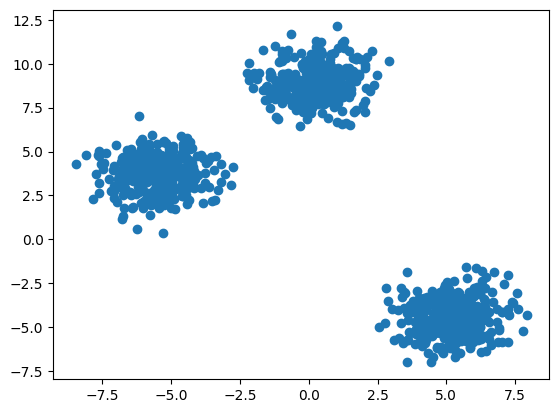

In [5]:
plt.scatter(X[:,0],X[:,1])

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [11]:
from sklearn.cluster import KMeans 

In [13]:
## Elbow method to decide k value 

WCSS = []

for k in range(1,12):
    kmeans = KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X_train)
    WCSS.append(kmeans.inertia_)
    

c:\Users\mayur\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\mayur\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\mayur\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\mayur\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

In [14]:
WCSS


[34827.57682552021,
 7935.437286145418,
 1319.2730531585612,
 1140.4677884655125,
 992.0708509383511,
 855.950274925766,
 756.6421023333426,
 668.0279813119683,
 582.6187210040038,
 537.8512718686602,
 486.5078959738445]

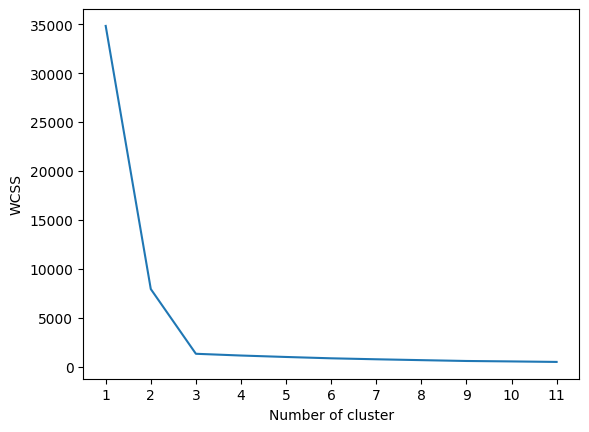

In [25]:
plt.plot(range(1,12),WCSS) 
plt.xticks(range(1,12))
plt.xlabel("Number of cluster")
plt.ylabel("WCSS")
plt.show()

In [26]:
 kmeans = KMeans(n_clusters=3,init='k-means++')

In [32]:
y_train_labels = kmeans.fit_predict(X_train)

c:\Users\mayur\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


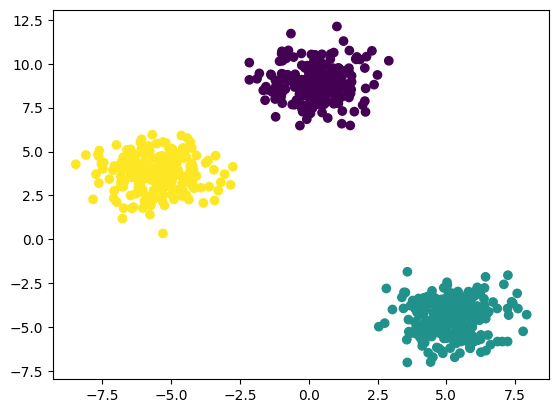

In [33]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_train_labels)

In [34]:
y_test_labels = kmeans.predict(X_test)

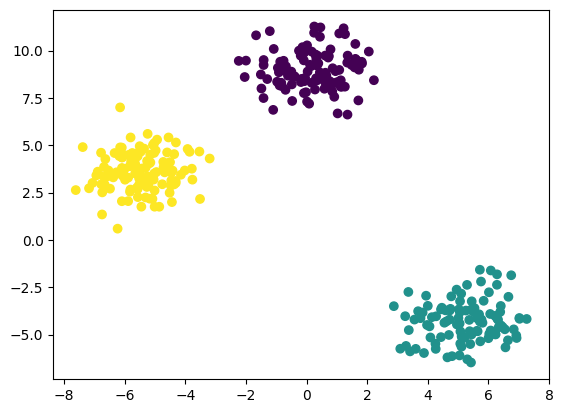

In [35]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_test_labels)

In [42]:
## knee locator 
from kneed import KneeLocator
kl = KneeLocator(range(1,12),WCSS,curve="convex",direction="decreasing")
kl.elbow


3

In [46]:
# performance metrics
from sklearn.metrics import silhouette_score

sil_score = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X_train)
    score = silhouette_score(X_train,kmeans.labels_)
    sil_score.append(score)


c:\Users\mayur\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\mayur\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\mayur\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\mayur\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

In [47]:
sil_score

[0.7281443868598331,
 0.8071181203797672,
 0.6357733426488265,
 0.48196009682399193,
 0.33753437696086896,
 0.34724179163335306,
 0.3447398136177631,
 0.3463414586607261,
 0.3387519278801995]